In [1]:
import numpy as np
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
import scipy.interpolate as interp
import scipy.stats as st
import scipy.signal as sig
from scipy.optimize import curve_fit
import pickle
import os


import astropy as ap
from astropy.io import fits
from astropy import table as t
from astropy.table import Table
from astropy import wcs
from astropy.cosmology import WMAP7


import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors

rcParams["font.family"] = "DejaVu Sans"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 1

In [2]:
os.chdir("/Users/nitya/Work/Paper2/Data")
drpal = t.Table.read('drpall-v2_5_3.fits')
drpal.add_index('plateifu')

In [3]:
drpal.columns

<TableColumns names=('plate','ifudsgn','plateifu','mangaid','versdrp2','versdrp3','verscore','versutil','versprim','platetyp','srvymode','objra','objdec','ifuglon','ifuglat','ifura','ifudec','ebvgal','nexp','exptime','drp3qual','bluesn2','redsn2','harname','frlplug','cartid','designid','cenra','cendec','airmsmin','airmsmed','airmsmax','seemin','seemed','seemax','transmin','transmed','transmax','mjdmin','mjdmed','mjdmax','gfwhm','rfwhm','ifwhm','zfwhm','mngtarg1','mngtarg2','mngtarg3','catidnum','plttarg','manga_tileid','nsa_iauname','ifudesignsize','ifutargetsize','ifudesignwrongsize','z','zmin','zmax','szmin','szmax','ezmin','ezmax','probs','pweight','psweight','psrweight','sweight','srweight','eweight','esweight','esrweight','nsa_field','nsa_run','nsa_camcol','nsa_version','nsa_nsaid','nsa_nsaid_v1b','nsa_z','nsa_zdist','nsa_sersic_absmag','nsa_elpetro_absmag','nsa_elpetro_amivar','nsa_sersic_mass','nsa_elpetro_mass','nsa_elpetro_ba','nsa_elpetro_phi','nsa_extinction','nsa_elpetro_th

In [4]:
index = np.where(drpal['srvymode']=='MaNGA dither')[0]
drpal = drpal[index]
index1 = np.where(drpal['z']>0)[0]
drpall = drpal[index1]
plate_ifu = drpall['plateifu']
print(len(drpal))
print(len(plate_ifu))
fits_files = ['manga-'+ str(x) + '-LOGCUBE.fits' for x in plate_ifu]

6661
6491


In [5]:
from astropy.cosmology import WMAP9 as cosmo
cosmo.comoving_distance([0.5, 1.0, 1.5])

<Quantity [1916.06942039, 3363.0706321 , 4451.74754107] Mpc>

In [6]:
#let's see the redshift distribution of the Manga galaxies
drpall.columns

<TableColumns names=('plate','ifudsgn','plateifu','mangaid','versdrp2','versdrp3','verscore','versutil','versprim','platetyp','srvymode','objra','objdec','ifuglon','ifuglat','ifura','ifudec','ebvgal','nexp','exptime','drp3qual','bluesn2','redsn2','harname','frlplug','cartid','designid','cenra','cendec','airmsmin','airmsmed','airmsmax','seemin','seemed','seemax','transmin','transmed','transmax','mjdmin','mjdmed','mjdmax','gfwhm','rfwhm','ifwhm','zfwhm','mngtarg1','mngtarg2','mngtarg3','catidnum','plttarg','manga_tileid','nsa_iauname','ifudesignsize','ifutargetsize','ifudesignwrongsize','z','zmin','zmax','szmin','szmax','ezmin','ezmax','probs','pweight','psweight','psrweight','sweight','srweight','eweight','esweight','esrweight','nsa_field','nsa_run','nsa_camcol','nsa_version','nsa_nsaid','nsa_nsaid_v1b','nsa_z','nsa_zdist','nsa_sersic_absmag','nsa_elpetro_absmag','nsa_elpetro_amivar','nsa_sersic_mass','nsa_elpetro_mass','nsa_elpetro_ba','nsa_elpetro_phi','nsa_extinction','nsa_elpetro_th

In [7]:
z1 = drpall['z']
z2 = drpall['nsa_z']
nsaid = drpall['nsa_nsaid']

In [8]:
rmag =drpall['nsa_sersic_absmag'][:,4]
zmag =drpall['nsa_sersic_absmag'][:,6]
Nr = [x[1] - x[4] for x in d['nsa_sersic_absmag']]

NameError: name 'd' is not defined

In [9]:
drpall['nsa_sersic_absmag'][0][1]

-16.7751

In [151]:
len(z2[z2<0])
len(nsaid[nsaid<0])

22

In [85]:
radii = 3
def rad(z,z_new):
    radii_new = ((1+z_new)*cosmo.comoving_distance(z)*
                 radii)/((1+z)*cosmo.comoving_distance(z_new))
    return radii_new
print(len(redz[redz>0.1]))

/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


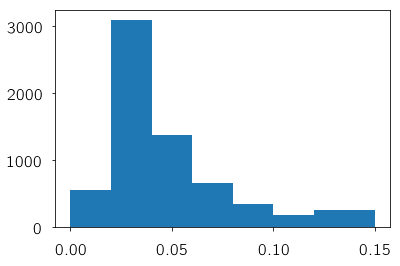

In [26]:
redz = z1[z2>0]
ind = nsaid[z2>0]
d = drpall[z2>0]
a = binned_statistic(redz, ind, statistic = 'count', bins =  [0,0.02,0.04,0.06,0.08,0.10,0.12,0.15])
plt.hist(redz,bins =  [0,0.02,0.04,0.06,0.08,0.10,0.12,0.15] )
#plt.yscale('log')
#plt.xticks([0,0.025,0.05,0.075,0.1,0.125,0.15])
plt.show()

In [22]:
a[0]

array([ 562., 3086., 1371.,  664.,  349.,  185.,  251.])

In [250]:
z_array = np.linspace(0,0.15,16)[1:]
new_array = []
for z in d['z']:
    new = [thing for thing in z_array if thing < z]
    new.append(z)
    new_array.append(new)
z_dict = dict(zip(d['z'],new_array))

In [253]:
z_dict[d['z'][1002]]

[0.01, 0.02, 0.0270996]

In [229]:
new_array

[[0.01, 0.02, 0.03],
 [0.01, 0.02, 0.03, 0.04],
 [0.01, 0.02, 0.03, 0.04],
 [0.01],
 [0.01, 0.02, 0.03, 0.04],
 [0.01, 0.02],
 [0.01, 0.02],
 [0.01, 0.02, 0.03],
 [0.01, 0.02],
 [0.01, 0.02, 0.03, 0.04],
 [0.01, 0.02, 0.03],
 [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11],
 [0.01, 0.02],
 [0.01, 0.02, 0.03, 0.04],
 [0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
 [0.01, 0.02, 0.03, 0.04],
 [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08],
 [0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14],
 [0.01, 0.02, 0.03],
 [0.01, 0.02, 0.03],
 [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
 [0.01, 0.02, 0.03],
 [0.01, 0.02],
 [0.01, 0.02, 0.03, 0.04],
 [0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14],
 [0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14],
 [0.01, 0.02],
 [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0

In [238]:
[z_dict[d['z'][1001]]]

[0.020478]

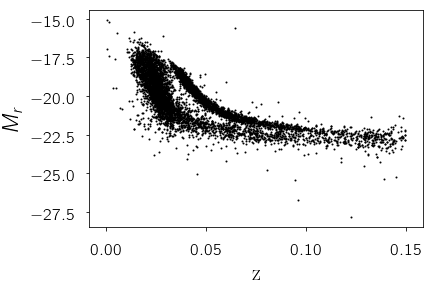

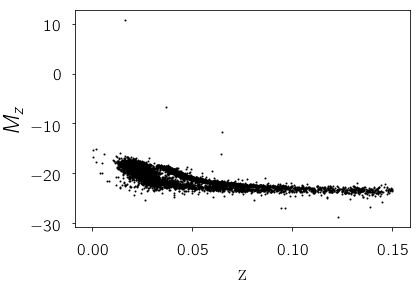

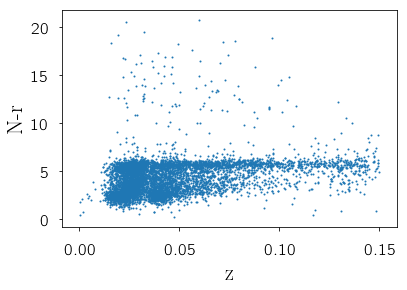

In [222]:
plt.scatter(d['z'], d['nsa_sersic_absmag'][:,4], s = 1.0, color = 'k')
plt.ylabel(r'$M_{r}$')
plt.xlabel('z')
plt.show()
plt.scatter(d['z'], d['nsa_sersic_absmag'][:,6], s = 1.0, color = 'k')
plt.ylabel(r'$M_{z}$')
plt.xlabel('z')
plt.show()
plt.scatter(d['z'],Nr,s=1.0)
plt.xlabel('z')
plt.ylabel('N-r')
plt.show()

In [153]:
class spec_measurements():
    """
    Spectral measurements class initialized
    on a datacube instance.
    Currently measures the HdA and Dn4000
    (as estimated in the MPA-JHU)
    """
    def __init__(self,drp_logcube,z):
        """
        wave: set of wavelengths the spectrograph spans
        """

        self.wave = (drp_logcube['WAVE']).data/(1+z)
        self.bandw_HdA = np.logical_and(self.wave > 4083.500,
                                        self.wave < 4122.250)
        self.bandw_HdA_blueside = np.logical_and(self.wave > 4041.600,
                                                 self.wave < 4079.750)
        self.bandw_HdA_redside = np.logical_and(self.wave > 4128.500,
                                                self.wave < 4161.000)
        self.blues = len(self.wave[self.bandw_HdA_blueside])
        self.reds = len(self.wave[self.bandw_HdA_redside])

        self.blue_wav = np.linspace(3850,3950,100)
        self.red_wav = np.linspace(4000,4100,100)

    def tsum(self, xin, yin):
        """
        Trapezoidal Sum to estimate
        area under curve
        """
        tsum = np.sum(np.abs((xin[1:]-xin[:-1]))*(yin[1:]+yin[:-1])/2. )
        return tsum

    def dn4000_red(self,spec):
        interp_spec = interp.interp1d(self.wave,spec)
        d4000_r = np.sum(interp_spec(self.red_wav))
        return d4000_r

    def dn4000_blue(self,spec):
        interp_spec = interp.interp1d(self.wave,spec)
        d4000_b =  np.sum(interp_spec(self.blue_wav))
        return d4000_b

    def dn_4000(self,specs):
        dn_4000 = np.sum([self.dn4000_red(spec) for spec in specs])/np.sum(
            [self.dn4000_blue(spec) for spec in specs])
        return dn_4000

    def HdA(self,specs):

        spec_av_blueside = np.sum([np.sum(spec[self.bandw_HdA_blueside]) for
                                   spec in specs])/(self.blues*len(specs))
        spec_av_redside = np.sum([np.sum(spec[self.bandw_HdA_redside]) for
                                  spec in specs])/(self.reds*len(specs))

        a_spec = (spec_av_redside - spec_av_blueside)/(
                (4161.000+4128.500)/2.0 - (4079.750+4041.600)/2.0)
        b_spec = spec_av_blueside - a_spec * (4079.750+4041.600)/2

        spec_cont_HdA = self.wave[self.bandw_HdA] * a_spec + b_spec
        mean_dip = np.mean([spec[self.bandw_HdA] for spec in specs])

        HdA = self.tsum(self.wave[self.bandw_HdA],
                        np.divide(spec_cont_HdA - mean_dip, spec_cont_HdA))
        return HdA


class aperture_measurements():
    """
    Aperture/annuli measurements class
    initialized on a fits file.
    """
        
    def __init__(self, file, z):
        """
        For each datacube, we have:
        NX,NY: the dimensions of the IFU
        flux: in the form of [:,NX,NY]
        x,y: recreating the grid
        radii: gives the radius for any spaxel
        """
        self.drp_logcube = fits.open(file)
        self.z = z
        self.NL, self.NY, self.NX = (self.drp_logcube['FLUX']).data.shape
        self.flux = (self.drp_logcube['FLUX']).data
        

        self.y = np.outer((np.arange(0, self.NX) + 0.5) - (self.NX/2.0),
                          np.ones(self.NX))
        self.x = np.transpose(self.y)
        self.grid = np.sqrt((self.y*self.y + self.x*self.x))
        self.radii = np.ravel(self.grid)

    def get_radii(self,z_new):
        #gets you the new radii for any redshift
        #radii_new = (1+z_new)*comdis(z_obs)*radii/((1+z_obs)*comdis(z_new))
        radii_new = ((1+z_new)*cosmo.comoving_distance(self.z)*
                     self.radii)/((1+self.z)*cosmo.comoving_distance(z_new))
        return np.array(radii_new)
        
    
    def get_spaxels(self, aperture, z_new):
        """
        Getting spaxels within an aperture
        """
        spectra = []
        for i in range(self.NX):
            for j in range(self.NY):
                thing = self.flux[:,i,j]
                spectra.append(thing)
        spectra = np.array(spectra)
        index = np.where(self.get_radii(z_new)<= aperture)[0]
        spaxels_within = spectra[index]
        return spaxels_within

    def get_spaxels_annulus(self,aperture,znew,ring_width):
        """
        Getting spaxels within an annulus
        defined by aperture + ring_width
        """
        spectra = []
        for i in range(self.NX):
            for j in range(self.NY):
                thing = self.flux[:,i,j]
                spectra.append(thing)
        spectra = np.array(spectra)
        new_radii = self.get_radii(z_new)
        index = np.where(new_radii>=aperture)[0]
        spaxels_within = spectra[index]
        new_radii = radii[index]
        index2 = np.where(new_radii<=aperture+ring_width)[0]
        return spaxels_within[index2]

    def get_spec_measure(self,aperture,znew,spectral_measure):
        """
        Hda/Dn4000/Halpha/(?) within aperture
        """
        specs = self.get_spaxels(aperture,znew)
        if spectral_measure == 'hdelta':
            return spec_measurements(self.drp_logcube,self.z).HdA(specs)
        elif spectral_measure == 'dn4000':
            return spec_measurements(self.drp_logcube, self.z).dn_4000(specs)
        elif spectral_measure == 'all':
            return [spec_measurements(self.drp_logcube, self.z).HdA(specs),
                    spec_measurements(self.drp_logcube, self.z).dn_4000(specs)]
        else:
            return False

    def get_spec_ann_measure(self,aperture,znew,ring_width,spectral_measure):
        """
        Hda/Dn4000/Halpha/(?) within annulus
        """
        specs = self.get_spaxels_annulus(aperture,znew,ring_width)
        if spectral_measure == 'hdelta':
            return spec_measurements(self.drp_logcube, self.z).HdA(specs)
        elif spectral_measure == 'dn4000':
            return spec_measurements(self.drp_logcube, self.z).dn_4000(specs)
        elif spectral_measure == 'all':
            return [spec_measurements(self.drp_logcube, self.z).HdA(specs),
                    spec_measurements(self.drp_logcube, sel.z).dn_4000(specs)]
        else:
            return False


In [209]:
a = aperture_measurements('manga-8254-9102-LOGCUBE.fits',0.0374824)
a1 = a.get_spaxels(3,0.0374824)

In [169]:
print(len(a1))
print(len(a2))
index = np.where(drpall['plateifu']=='8254-9102')[0]
print(index)

32
4
[1591]


In [94]:
drpall['z'][1591], drpall['nsa_z'][1591]

(0.0374824, 0.0374824)

In [91]:
a.columns

<TableColumns names=('SLITFILE','METFILE','HARNAME','IFUDESIGN','FRLPLUG','MANGAID','AIRTEMP','HUMIDITY','PRESSURE','SEEING','PSFFAC','TRANSPAR','PLATEID','DESIGNID','CARTID','MJD','EXPTIME','EXPNUM','SET','MGDPOS','MGDRA','MGDDEC','OMEGASET_U','OMEGASET_G','OMEGASET_R','OMEGASET_I','OMEGASET_Z','EAMFIT_RA','EAMFIT_DEC','EAMFIT_THETA','EAMFIT_THETA0','EAMFIT_A','EAMFIT_B','EAMFIT_RAERR','EAMFIT_DECERR','EAMFIT_THETAERR','EAMFIT_THETA0ERR','EAMFIT_AERR','EAMFIT_BERR','TAIBEG','HADRILL','LSTMID','HAMID','AIRMASS','IFURA','IFUDEC','CENRA','CENDEC','XFOCAL','YFOCAL','MNGTARG1','MNGTARG2','MNGTARG3','BLUESN2','REDSN2','BLUETHRUPT','REDTHRUPT','BLUEPSTAT','REDPSTAT','DRP2QUAL','THISBADIFU','PF_FWHM_G','PF_FWHM_R','PF_FWHM_I','PF_FWHM_Z')>

In [ ]:
#getting the angular size based on redshift;

#z_obs: Observed Redshift
#z_new: The new redshift we want to place the galaxy at.
#we just need to move the radii grid to the new coordinates;
#radii_new = (1+z_new)*comdis(z_new)*radii/((1+z_obs)*comdis(z_obs))


In [11]:
os.chdir("/Users/nmd299/Manga/scripts")
from aperture_spec import spec_measurements, aperture_measurements

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nmd299/Manga/scripts'

In [31]:
np.array(sample[0])[:,0]

array([       nan, 1.75274814, 1.6745229 , 1.56383712, 1.57659067,
       1.63744225, 1.66795082, 1.63019336, 1.53061619, 1.4340713 ,
       1.37460777, 1.36934043, 1.40282476, 1.46262402, 1.49005127,
       1.49806146, 1.50496281, 1.55235101, 1.63509035, 1.73098761])

In [54]:
import time
print(time.strftime("%H:%M:%S",time.localtime()))

18:27:33


In [56]:
import datetime
start = datetime.datetime.now()
# some code
end = datetime.datetime.now()
elapsed = end - start
print(elapsed)
# or
print(elapsed.seconds,":",elapsed.microseconds) 

0:00:00.000051
0 : 51


In [96]:
os.chdir('/Volumes/500GB/nmd299/Data/mpl8')
afile = open(r'hdelta_dn4000.pkl','rb')
d = pickle.load(afile, encoding = 'latin1')
afile.close()

In [99]:
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d

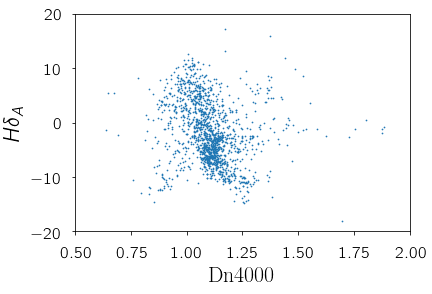

In [110]:
plt.scatter(d[:,1], d[:,0], s = 0.5)
plt.xlabel('Dn4000')
plt.ylabel(r'$H\delta_{A}$')
plt.xlim(0.5,2)
plt.ylim(-20,20)
plt.show()

In [212]:
afile = open(r'/Users/nitya/Work/Paper2/scripts/filename_dict','rb')
fname = pickle.load(afile, encoding = 'latin1')
afile.close()

In [219]:
a = list(fname.keys())

In [221]:
[fname[a[i]] for i in range(0,2)]

['/Volumes/500GB/nmd299/data/mpl8/manga-10001-12701-LOGCUBE.fits',
 '/Volumes/500GB/nmd299/data/mpl8/manga-10001-12702-LOGCUBE.fits']

In [13]:
a = [np.nan,np.nan,3]

In [14]:
np.isnan(a)

array([ True,  True, False])

In [20]:
3000*3/60

150.0